In [1]:
##### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top50spotify2019/top50.csv


In [2]:
top50 = pd.read_csv('../input/top50spotify2019/top50.csv', encoding='ISO-8859-1')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
top50.head(4)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86


In [5]:
top50.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

To get the row index that corresponds to the minimum or maximum value in a column:

In [6]:
top50['Length.'].idxmax()

22

This implies that row index 22 contains the highest value for the Length column

### Conditional Statements

adding conditional statements eg >, <, =>, etc yields a boolean vector.

This is useful as it allows us to process only rows with True values.

In [7]:
(top50['Beats.Per.Minute'] > 100).sum()

29

There are 29 entries with more than 100 beats per minute

The **loc()** function allows us to access data via labels:

* a single scalar label
* a list of labels
* a single object
* a boolean array

In [8]:
#a single scalar label
top50.loc[0]  #prints a row that has a label/index 0

Unnamed: 0                     1
Track.Name              Señorita
Artist.Name         Shawn Mendes
Genre               canadian pop
Beats.Per.Minute             117
Energy                        55
Danceability                  76
Loudness..dB..                -6
Liveness                       8
Valence.                      75
Length.                      191
Acousticness..                 4
Speechiness.                   3
Popularity                    79
Name: 0, dtype: object

In [9]:
#a list of labels
top50.loc[[0,2]]  #prints the rows that have labels of 0 and 2

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [10]:
#boolean array
top50.loc[top50['Beats.Per.Minute'] > 110] #prints all rows whose bpm >110

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90


In [11]:
#prints only the indexed columns
top50.loc[top50['Beats.Per.Minute'] > 110][['Track.Name','Artist.Name','Genre']]

,Track.Name,Artist.Name,Genre
0,Señorita,Shawn Mendes,canadian pop
2,boyfriend (with Social House),Ariana Grande,dance pop
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap
6,Ransom,Lil Tecca,trap music
7,How Do You Sleep?,Sam Smith,pop
8,Old Town Road - Remix,Lil Nas X,country rap
9,bad guy,Billie Eilish,electropop
10,Callaita,Bad Bunny,reggaeton
13,Otro Trago - Remix,Sech,panamanian pop
16,LA CANCIÓN,J Balvin,latin


####  Q1. Print the most and least popular songs.

In [12]:
#this code prints the row that contains the entry for the most popular song(highest value in the 'popularity column')
top50.loc[[top50['Popularity'].idxmax()]]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [13]:
#prints the least popular song
top50.loc[[top50['Popularity'].idxmin()]]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
25,26,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70


#### Q2. Write code to print songs, if we sorted by their popularity - id descending order.

In [14]:
top50.sort_values('Popularity', ascending = False)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


## PRACTICE Qns

### 1. Print the Shortest Song

In [15]:
top50.loc[[top50['Length.'].idxmin()]]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91


### 2. Print the 5 Shortest Songs

In [16]:
top50.sort_values('Length.')[0:5]

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
17,18,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91


### 3. Print the average length of the 5 Shortest Songs

In [17]:
top50.sort_values('Length.')[0:5]['Length.'].mean()

142.8

###  4. Write a function that accepts a DataFrame as an input and returns True if there exists any null values in the DataSet. Otherwise, returns False. Pass top50 to the function in order to test it.

In [18]:
def nullT(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            return True
    return False
nullT(top50)

False

This implies that our top50 dataset does not contain any missing values for all columns

### 5. How many distinct genres are present in the dataset?

In [19]:
top50['Genre'].nunique()

21

There are 21 unique genres in the dataset

### 6. Print the songs that have a Danceability score above 80 and a popularity above 86. HINT: you can combine conditional statements with the & operator, and each item must be surrounded with ( ) brackets.

In [20]:
top50.loc[top50['Danceability'] > 80][top50['Popularity'] > 86]

#or

#top50.loc[(top50['Danceability'] > 80) & (top50['Popularity'] > 86) ]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
44,45,Con Altura,ROSALÍA,r&b en espanol,98,69,88,-4,5,75,162,39,12,88


 ### 7. Print the songs that are faster than the average Top 50 and more popular than the average Top 50?

In [21]:
avg_bpm = top50['Beats.Per.Minute'].mean()
avg_pop = top50['Popularity'].mean()
top50.loc[top50['Beats.Per.Minute'] > avg_bpm][top50['Popularity'] > avg_pop]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
24,25,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89


### 8. Plot a histogram of the Genre counts (x-axis is the Genres, y-axis is the # of songs with that Genre)

(array([ 4., 15.,  3.,  4.,  4.,  8.,  2.,  4.,  2.,  4.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

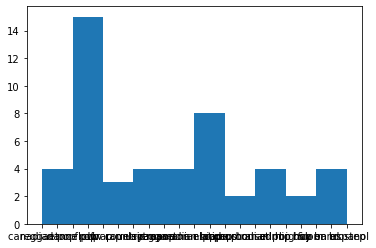

In [22]:
plt.hist('Genre', data = top50)